<a href="https://colab.research.google.com/github/a12475981007/project/blob/master/ML/HW02_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. 請至Kaggle 找titanic dataset 使用 SVM
簡單套用 model = SVC(), 查看 confusion matrix and accuracy 指標

In [4]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer


data = pd.read_csv('train.csv')
X = data[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex']]
y = data['Survived']

#one-hot-encording by using pandas
X = pd.get_dummies(X)

#資料遺失處理
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X)
X = imputer.transform(X)
# print(X[:10])


#切分訓練與測試資料
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#模型訓練
model = SVC().fit(X_train, y_train)

#Confusion matrix & Accuracy
svc_score = model.score(X_test, y_test)
svc_pred = model.predict(X_test)
svc_matric = confusion_matrix(y_test, svc_pred)

print('Accuracy: ', svc_score)
print('Confusion Matrix:\n', svc_matric)



Accuracy:  0.7206703910614525
Confusion Matrix:
 [[104   6]
 [ 44  25]]


#2. Iris data set 3類 使用 SVM 並劃出boundary
簡單套用 model = SVC(), 查看 confusion matrix and accuracy 指標

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


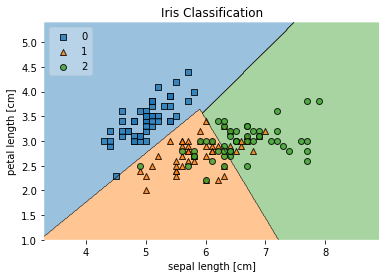

Accuracy: 0.7333333333333333
Confusion Matrix:
 [[11  0  0]
 [ 0  9  4]
 [ 0  4  2]]


In [38]:
from sklearn import datasets
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

#Load Iris dataset
iris = datasets.load_iris()

X = iris.data[:, :2]
y = iris.target

#  create a mesh to plot in
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

model = SVC(kernel = 'linear')
model.fit(X, y)

plot_decision_regions(X, y, clf=model, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('Iris Classification')
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) 
iris_score = model.score(X_test, y_test)
iris_pred = model.predict(X_test)
iris_matrix = confusion_matrix(y_test, iris_pred)

print("Accuracy:", iris_score)
print("Confusion Matrix:\n", iris_matrix)


#3. Iirs dataset 挑一個做即可
一對多法（one-versus-rest，OVR SVMs）and
一對一法（one-versus-one，OVO SVMs）

In [46]:
from sklearn.multiclass import OneVsOneClassifier

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 0) 

svc_model = SVC()

ovo_model = OneVsOneClassifier(svc_model)
ovo_model.fit(X_train, y_train)

ovo_score = ovo_model.score(X_test, y_test)
ovo_pred = ovo_model.predict(X_test)
ovo_matrix = confusion_matrix(y_test, ovo_pred)

print("one-versus-one\nAccuracy:", ovo_score)
print("Confusion Matrix:\n", ovo_matrix)


one-versus-one
Accuracy: 0.9466666666666667
Confusion Matrix:
 [[21  0  0]
 [ 0 29  1]
 [ 0  3 21]]


#4. 進行SVC 優化 (可進行超參數優化或是比對策略的優或)
比對策略:OVR,OVO, （挑跟上面不一樣）和新型  DAG, hirachical 
超參數優化 Grid Serach, meta-heuristic, Optuna

#5. 將上面方法用在舊金山 犯罪類型39種吧（評分only on SVM 的處理）